<a href="https://colab.research.google.com/github/rinaldijasmi/Dicoding-AndroidPemula/blob/master/TugasBesarKelompokML_Classification_Kendaraan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Besar Kelompok Mata Kuliah Pembelajaran Mesin**

Classfication Data Kendaraan => Memprediksi apakah
pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.

**Alfajri** - 1301208558

**Rinaldi Jasmi** - 1301208557

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import random as rand
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# **IMPORT & EKSPLORASI DATA**

In [ ]:
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')


In [ ]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             No

# **PREPROCESSING**

In [ ]:
df_train.drop(['id'], inplace=True, axis=1)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## **Handling Missing Value**

In [ ]:
df_train['Jenis_Kelamin'].fillna(value=df_train['Jenis_Kelamin'].mode()[0],inplace=True)
df_train['Umur'].fillna(value=df_train['Umur'].mean(),inplace=True)
df_train['SIM'].fillna(value=df_train['SIM'].mode()[0],inplace=True)
df_train['Kode_Daerah'].fillna(value=df_train['Kode_Daerah'].mode()[0],inplace=True)
df_train['Sudah_Asuransi'].fillna(value=df_train['Sudah_Asuransi'].mode()[0],inplace=True)
df_train['Umur_Kendaraan'].fillna(value=df_train['Umur_Kendaraan'].mode()[0],inplace=True)
df_train['Kendaraan_Rusak'].fillna(value=df_train['Kendaraan_Rusak'].mode()[0],inplace=True)
df_train['Premi'].fillna(value=df_train['Premi'].mean(),inplace=True)
df_train['Kanal_Penjualan'].fillna(value=df_train['Kanal_Penjualan'].mode()[0],inplace=True)
df_train['Lama_Berlangganan'].fillna(value=df_train['Lama_Berlangganan'].mean(),inplace=True)

df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Convert Object into Int, Float into Int**

In [ ]:
# Replace Umur_Kendaraan to Integer
df_train.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)
df_test.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)

# Replace Jenis Kelamin to Integer
df_train.replace(['Wanita', 'Pria'],[0,1],inplace=True)
df_test.replace(['Wanita', 'Pria'],[0,1],inplace=True)

# Replace Kendaraan_Rusak to Integer
df_train.replace(['Tidak', 'Pernah'],[0,1],inplace=True)
df_test.replace(['Tidak', 'Pernah'],[0,1],inplace=True)

In [ ]:
#Float to Integer
df_train = df_train.astype(int)
df_test = df_test.astype(int)

In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Jenis_Kelamin      285831 non-null  int64
 1   Umur               285831 non-null  int64
 2   SIM                285831 non-null  int64
 3   Kode_Daerah        285831 non-null  int64
 4   Sudah_Asuransi     285831 non-null  int64
 5   Umur_Kendaraan     285831 non-null  int64
 6   Kendaraan_Rusak    285831 non-null  int64
 7   Premi              285831 non-null  int64
 8   Kanal_Penjualan    285831 non-null  int64
 9   Lama_Berlangganan  285831 non-null  int64
 10  Tertarik           285831 non-null  int64
dtypes: int64(11)
memory usage: 24.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 no

## **Split Dataset**

In [ ]:
# Data Train
X_train = df_train.drop('Tertarik', axis=1)
y_train = df_train['Tertarik'].values

# Data Test
X_test = df_test.drop('Tertarik', axis=1)
y_test = df_test['Tertarik'].values

display(X_train.shape)
display(X_test.shape)

(285831, 10)

(47639, 10)

In [ ]:
X = df_train[df_train.columns[:10]]
y = df_train['Tertarik']

In [ ]:
# SCALLING

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **KNN CLASSIFICATION**

## **KNN Model**

### Predict optimal K value

Maximum accuracy:  0.8764457692226957 at K = 33


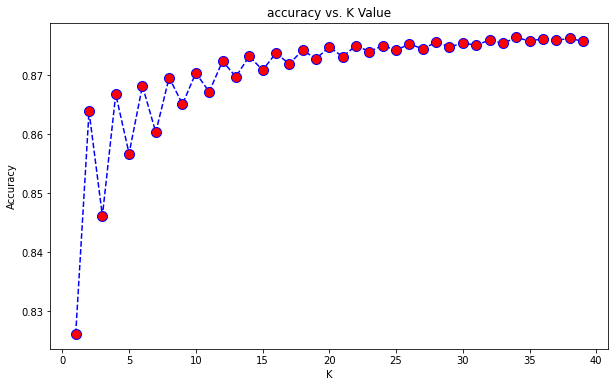

In [ ]:
acc = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
optimalK = acc.index(max(acc))
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",optimalK)

### **Build KNN classification model with optimal K value**

In [ ]:
model = KNeighborsClassifier(n_neighbors = optimalK)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

## **Prediction**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
output = pd.DataFrame({ 'Jenis_Kelamin' : df_test['Jenis_Kelamin'], 'Umur' : df_test['Umur'], 'SIM' : df_test['SIM'], 'Kode_Daerah' : df_test['Kode_Daerah'], 'Sudah_Asuransi' : df_test['Sudah_Asuransi'], 'Umur_Kendaraan' : df_test['Umur_Kendaraan'], 'Kendaraan_Rusak' : df_test['Kendaraan_Rusak'], 'Premi' : df_test['Premi'], 'Kanal_Penjualan' : df_test['Kanal_Penjualan'], 'Lama_Berlangganan' : df_test['Lama_Berlangganan'], 'Tertarik_ModelPre': y_pred })

In [ ]:
output

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik_ModelPre
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,2,1,31039,124,67,0
47635,1,41,1,15,0,1,1,2630,157,232,0
47636,1,24,1,29,1,0,0,33101,152,211,0
47637,1,59,1,30,0,1,1,37788,26,239,0


In [ ]:
#Create CSV file
output.to_csv('hasilprediksi_kendaraan_withmodelKNN.csv')

## **Accuration**

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8754381913978043


In [ ]:
cls_report = classification_report(y_test, y_pred)

print(f'classification report: \n{cls_report}')

classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.41      0.03      0.06      5861

    accuracy                           0.88     47639
   macro avg       0.65      0.51      0.49     47639
weighted avg       0.82      0.88      0.83     47639

